In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
import ast


In [25]:
details_df = pd.read_csv("details.csv", index_col=0)
timestamps_df = pd.read_csv("timestamps.csv", index_col=0)
details_df['price'] = details_df['price']/100
details_df

,name,developer,publisher,positive,negative,min_owners,max_owners,average_forever,average_2weeks,median_forever,median_2weeks,ccu,price,initialprice,discount,genre,tags,languages
570,Dota 2,Valve,Valve,1746111,379671,200000000,500000000,39238,1424,1150,954,574642,0.00,0,0,"['Action', 'Strategy', 'Free to Play']","['Free to Play', 'MOBA', 'Multiplayer', 'Strat...","['English', 'Bulgarian', 'Czech', 'Danish', 'D..."
730,Counter-Strike: Global Offensive,Valve,Valve,6818622,951925,100000000,200000000,30990,651,6487,292,980736,0.00,0,0,"['Action', 'Free to Play']","['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['English', 'Czech', 'Danish', 'Dutch', 'Finni..."
578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1303590,954525,50000000,100000000,23619,527,6705,162,358394,0.00,0,0,"['Action', 'Adventure', 'Massively Multiplayer...","['Survival', 'Shooter', 'Battle Royale', 'Mult...","['English', 'Korean', 'Simplified Chinese', 'F..."
1063730,New World,Amazon Games,Amazon Games,189465,79914,50000000,100000000,7237,790,3002,1335,27383,39.99,3999,0,"['Action', 'Adventure', 'Massively Multiplayer...","['Massively Multiplayer', 'Open World', 'MMORP...","['English', 'French', 'Italian', 'German', 'Sp..."
1172470,Apex Legends,Respawn Entertainment,Electronic Arts,608338,156655,50000000,100000000,7130,458,692,325,248316,0.00,0,0,"['Action', 'Adventure', 'Free to Play']","['Free to Play', 'Battle Royale', 'Multiplayer...","['English', 'French', 'Italian', 'German', 'Sp..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512720,Velocidevorium,Really Slick,Really Slick,0,0,0,20000,0,0,0,0,0,0.00,0,0,"['Action', 'Casual', 'Indie']",[],['English']
848400,Simian Rising,All Caps Industries,All Caps Industries,0,0,0,20000,0,0,0,0,0,12.99,1299,0,"['Action', 'Adventure', 'Indie', 'Simulation',...",[],['English']
1119500,FIGHT BALL - BOXING VR,J-TEC,J-TEC,2,2,0,20000,0,0,0,0,0,4.99,499,0,"['Action', 'Indie', 'Sports']","['Action', 'Indie', 'Sports', 'VR', 'Boxing']",['English']
1234930,Reach,Mr. Creep,Mr. Creep Game,2,1,0,20000,0,0,0,0,0,6.99,699,0,"['Adventure', 'Indie']","['Adventure', 'Indie', 'Horror', '2D', 'Story ...","['English', 'Russian']"


In [26]:
timestamps_df

,2012-07-01,2012-08-01,2012-09-01,2012-10-01,2012-11-01,2012-12-01,2013-01-01,2013-02-01,2013-03-01,2013-04-01,...,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01
570,75041.0,108689.0,118724.0,171860.0,169631.0,213521.0,260989.0,283870.0,325598.0,299667.0,...,752617.0,809580.0,711816.0,679525.0,702381.0,855495.0,777466.0,780443.0,767353.0,705063.0
730,1642.0,52261.0,36057.0,20850.0,50533.0,27553.0,31359.0,35238.0,32166.0,31966.0,...,1519457.0,1510231.0,1802853.0,1665869.0,1222913.0,1369511.0,1556326.0,1364902.0,1161043.0,1204943.0
578080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,459344.0,444973.0,414957.0,376727.0,356738.0,397857.0,415099.0,444585.0,502374.0,468202.0
1063730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24140.0,28227.0,23468.0,20288.0,25878.0,20091.0,25912.0,77642.0,45836.0,30227.0
1172470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,603290.0,562634.0,584294.0,446463.0,349762.0,451223.0,452991.0,435229.0,438349.0,336802.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
848400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1119500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Index(['name', 'developer', 'publisher', 'positive', 'negative', 'min_owners',
       'max_owners', 'average_forever', 'average_2weeks', 'median_forever',
       'median_2weeks', 'ccu', 'price', 'initialprice', 'discount', 'genre',
       'tags', 'languages'],
      dtype='object')
Index([    570,     730,  578080, 1063730, 1172470,     440,  271590,     550,
       1599340,  304930,
       ...
        591020,  654200,  706550,     852,   18310,  512720,  848400, 1119500,
       1234930, 2225520],
      dtype='int64', length=68748)


<Figure size 2000x1000 with 0 Axes>

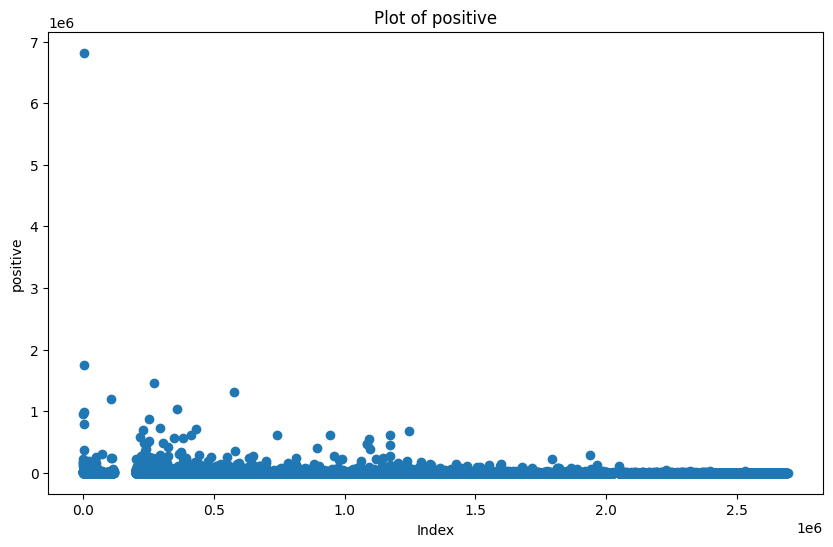

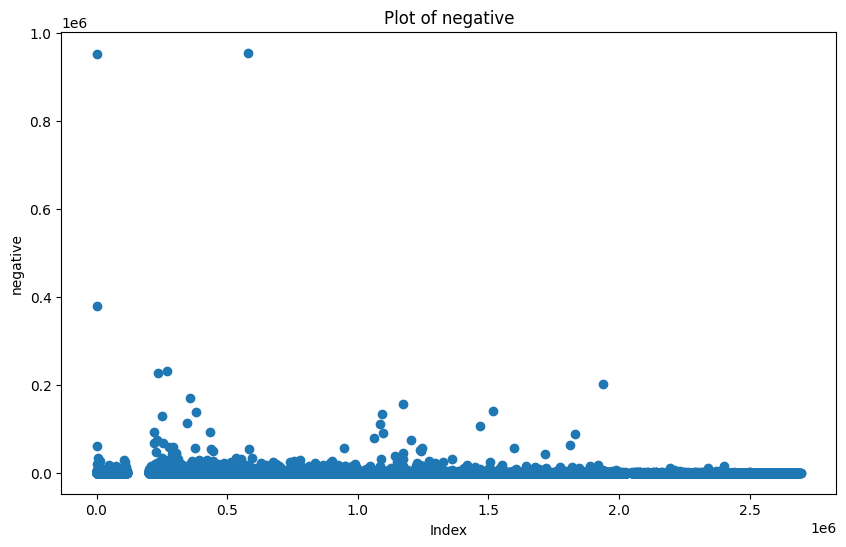

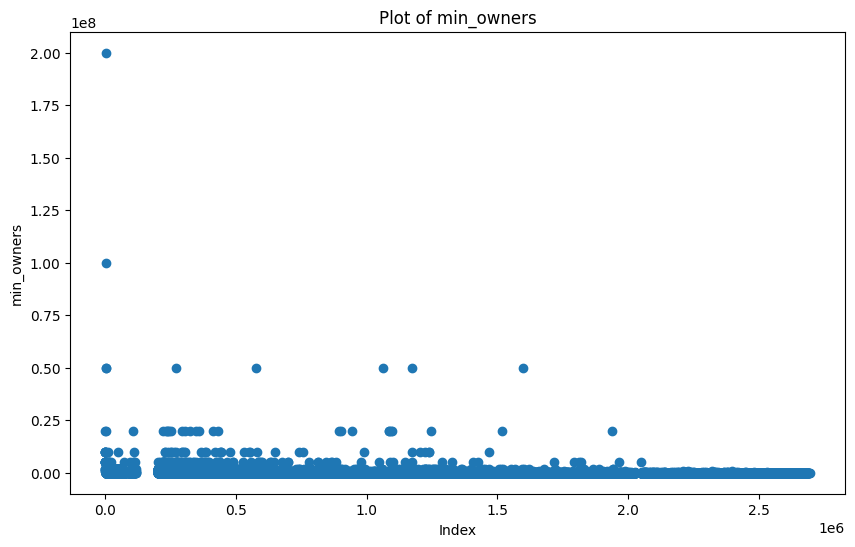

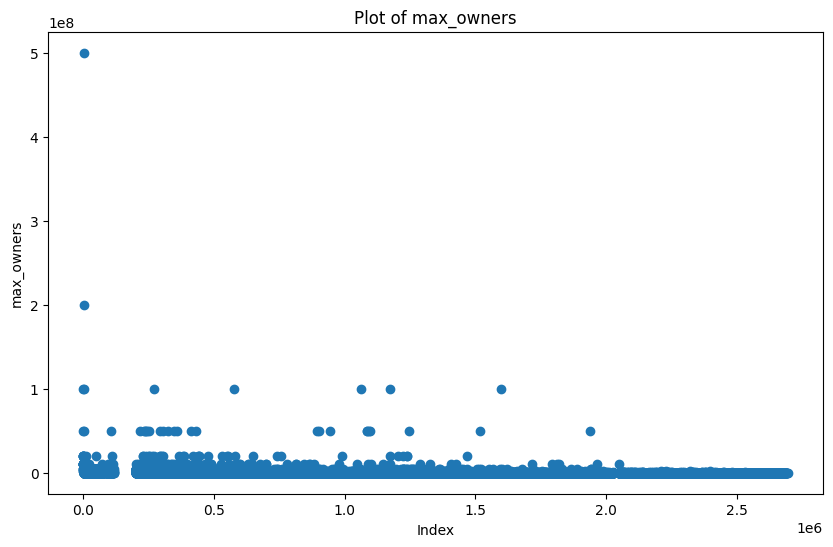

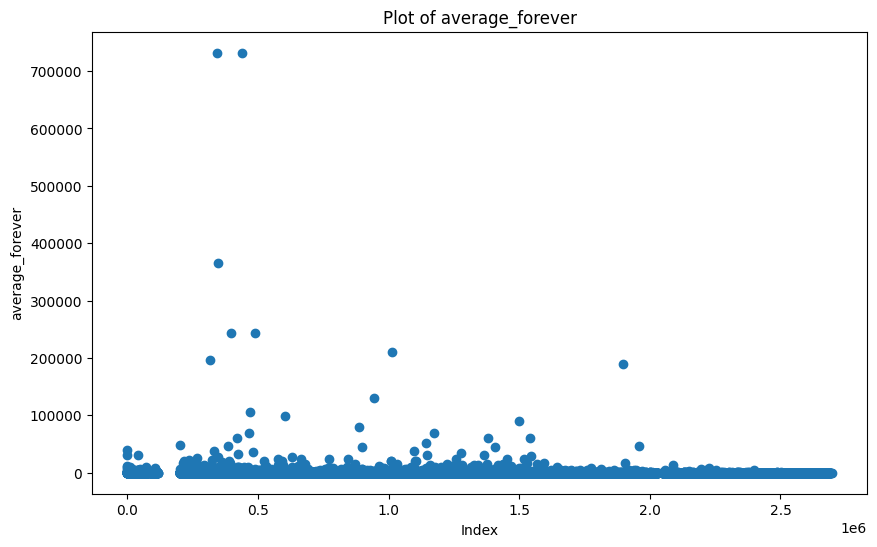

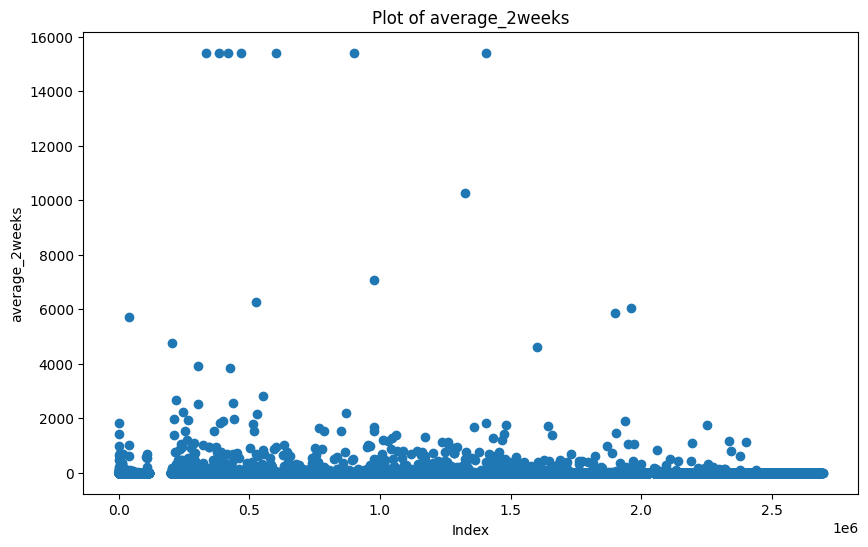

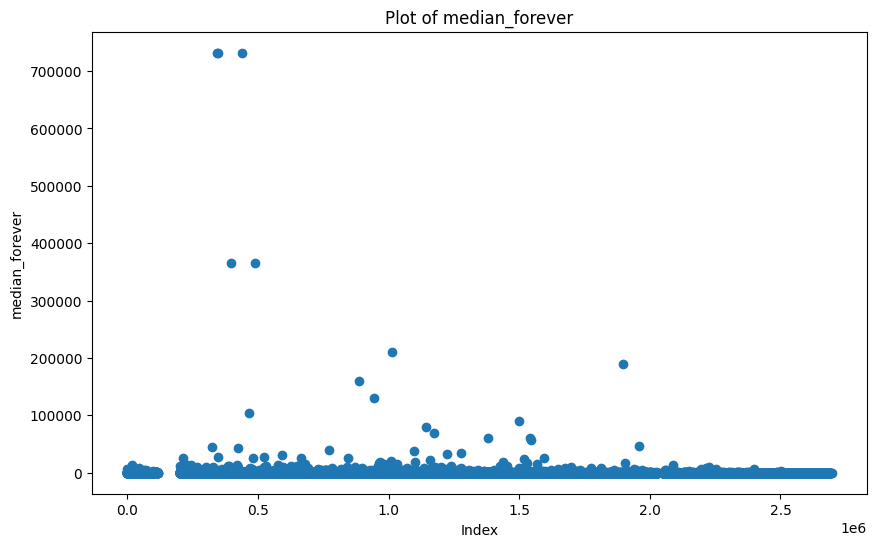

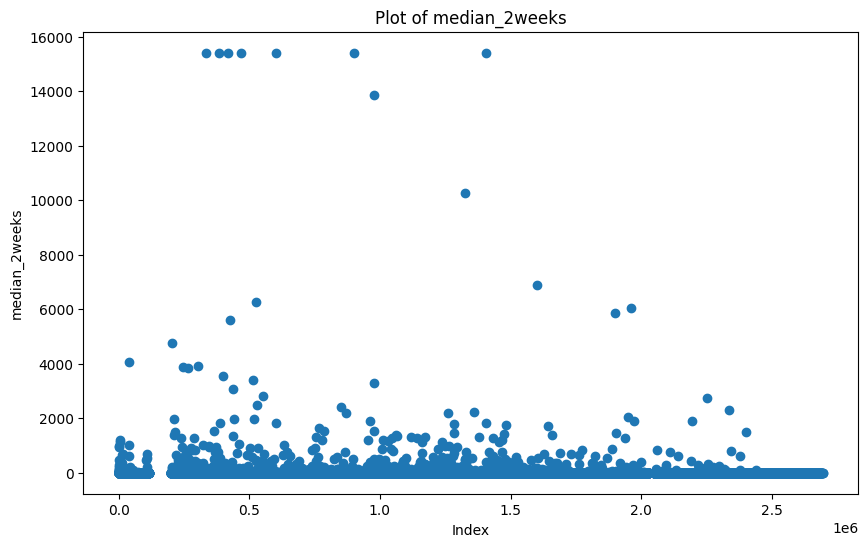

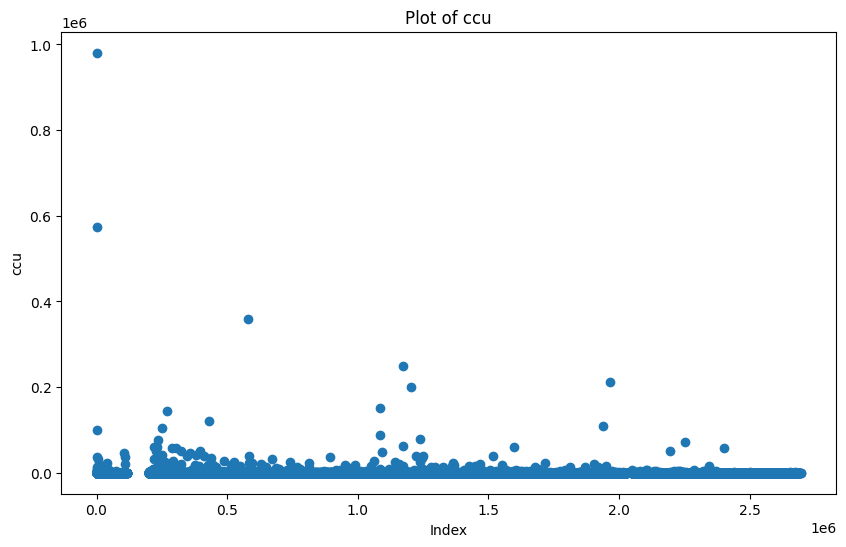

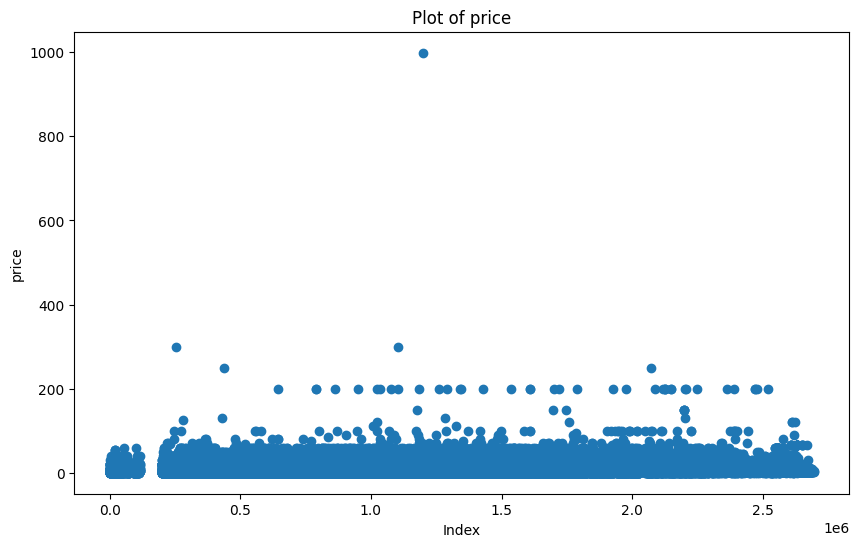

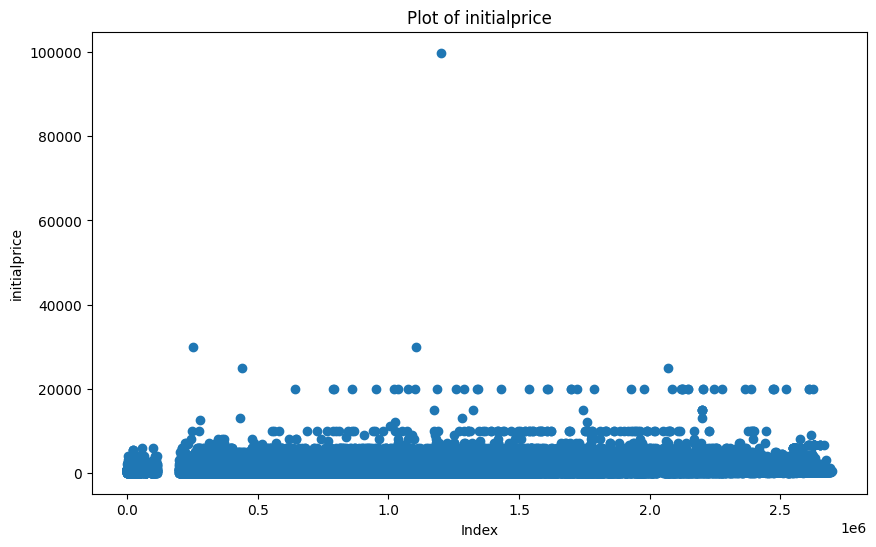

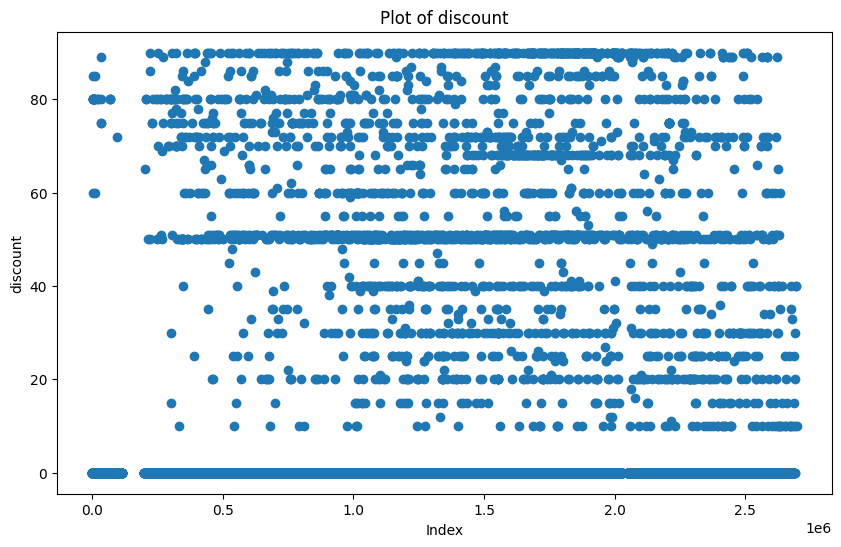

In [27]:
plt.figure(figsize=(20, 10))  
print(details_df.columns)

# # Convert all columns to numeric, non-convertible columns will become NaN
# for col in details_df.columns:
#     details_df[col] = pd.to_numeric(details_df[col], errors='coerce')

print(details_df.index)

# Plot each column
for col, type in zip(details_df.columns, details_df.dtypes): # skip index
    if type in ['int64', 'float64']:
        # details_df[col] = pd.to_numeric(details_df[col], errors='coerce')
        plt.figure(figsize=(10, 6))  # Create a new figure for each plot
        plt.scatter(details_df.index, details_df[col])  # Use DataFrame index as x-axis
        plt.title(f"Plot of {col}")
        plt.xlabel("Index")
        plt.ylabel(col)
        plt.show()


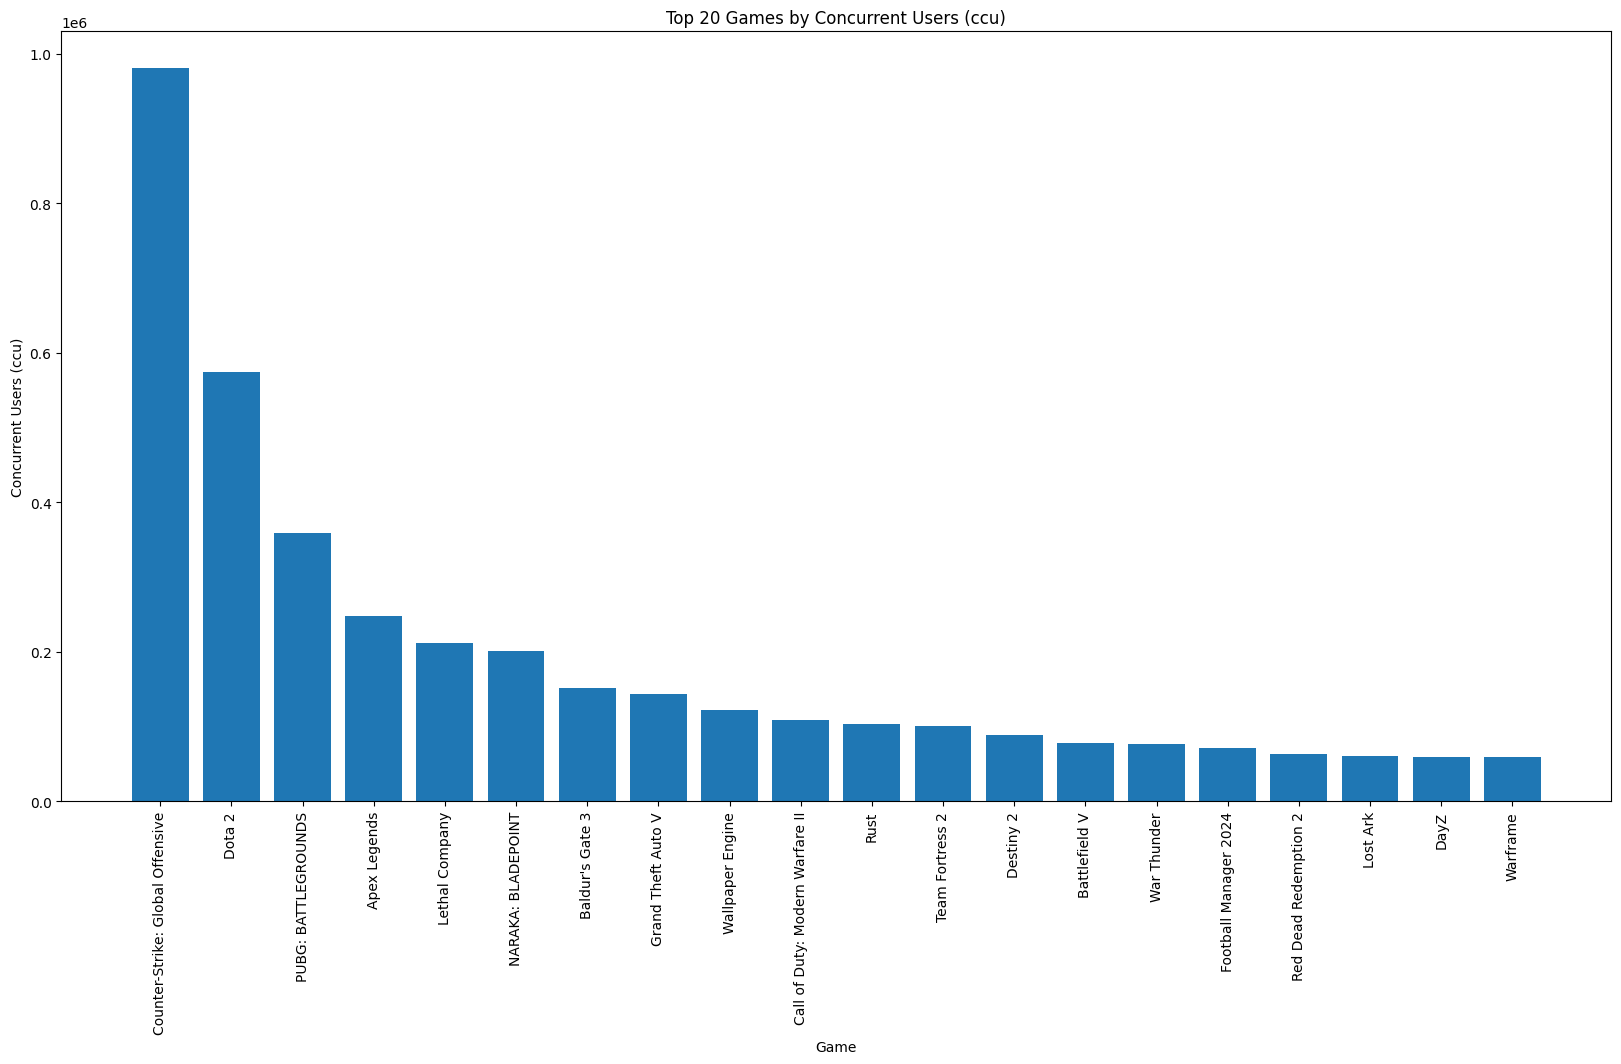

In [28]:
# Ensuring the 'name' column is treated as a string and plotting ccu for a subset of top games

# Converting 'name' column to string to avoid TypeError
details_df['name'] = details_df['name'].astype(str)

# Selecting the top 20 games based on concurrent users for a more manageable plot
top_games = details_df.nlargest(20, 'ccu')

plt.figure(figsize=(20, 10))
plt.bar(top_games['name'], top_games['ccu'])
plt.title("Top 20 Games by Concurrent Users (ccu)")
plt.xlabel("Game")
plt.ylabel("Concurrent Users (ccu)")
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability
plt.show()


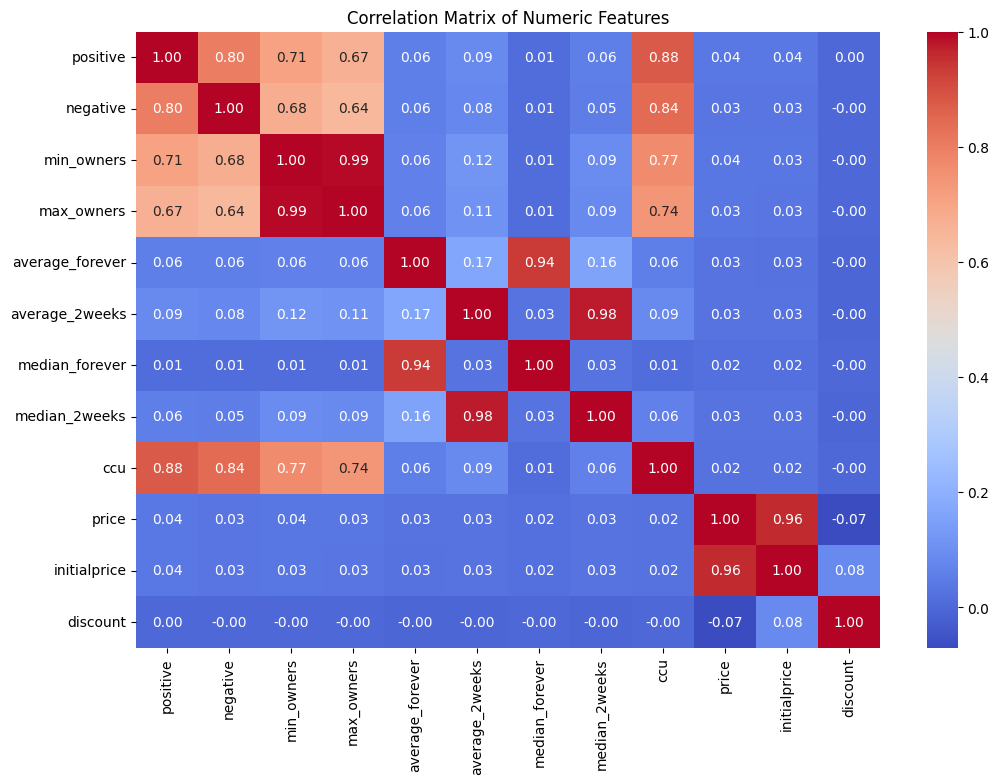

In [29]:
import seaborn as sns

# Let's create a more interesting visualization by exploring correlations in the data

# For this, we'll focus on numerical columns and see how they are related to each other
numeric_columns = details_df.select_dtypes(include=['int64', 'float64'])

# Computing the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()




Correlation Coefficients: Each cell in the heatmap contains a correlation coefficient that ranges from -1 to 1. This coefficient measures the strength and direction of the linear relationship between two numeric variables.

Positive Correlation (Close to +1): When two variables have a correlation coefficient close to +1, it indicates a strong positive correlation. This means that as one variable increases, the other variable tends to increase as well. For example, if the number of positive reviews (positive) and the number of concurrent users (ccu) have a high positive correlation, it suggests that games with more positive reviews tend to have more concurrent users.

Negative Correlation (Close to -1): A correlation coefficient close to -1 signifies a strong negative correlation. In this scenario, as one variable increases, the other tends to decrease. For instance, if there was a negative correlation between price (price) and the number of concurrent users (ccu), it would suggest that higher-priced games tend to have fewer concurrent users.

No Correlation (Close to 0): A coefficient near 0 implies that there is little or no linear relationship between the variables. This means changes in one variable do not necessarily correspond to changes in the other.

Color Coding: The heatmap uses color coding to visually represent the strength and direction of correlations. Typically, warm colors (like red) indicate positive correlations, and cool colors (like blue) indicate negative correlations. The intensity of the color corresponds to the strength of the correlation.

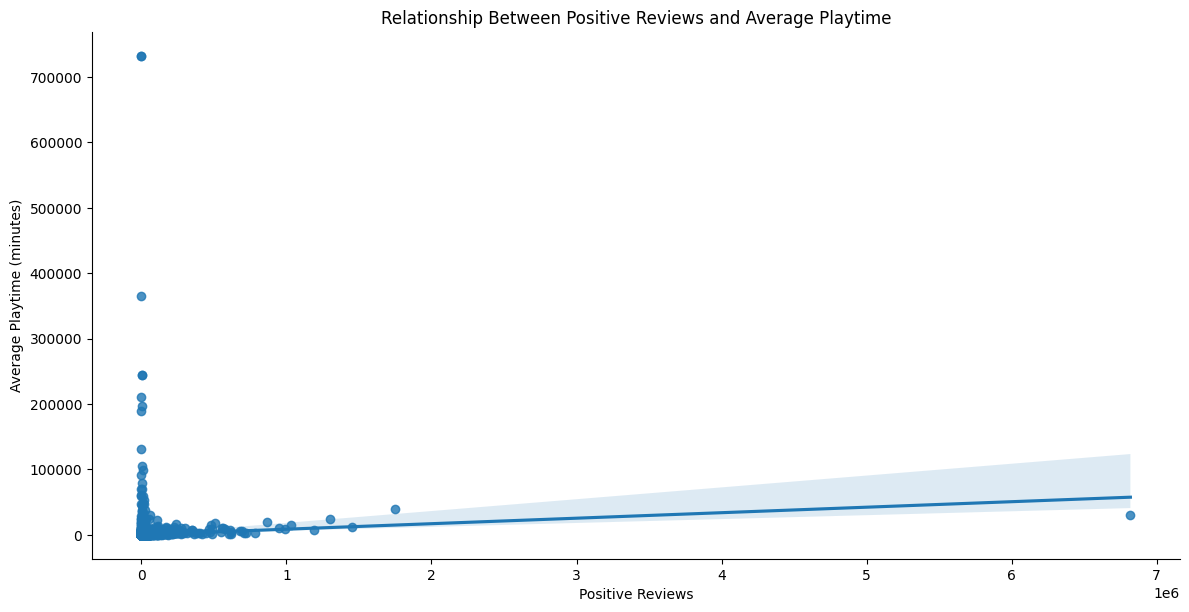

In [30]:
# Creating a scatter plot with a regression line for positive reviews vs average playtime

sns.lmplot(x='positive', y='average_forever', data=details_df, aspect=2, height=6)
plt.title("Relationship Between Positive Reviews and Average Playtime")
plt.xlabel("Positive Reviews")
plt.ylabel("Average Playtime (minutes)")
plt.show()


1. Time Series Analysis for a Single Game

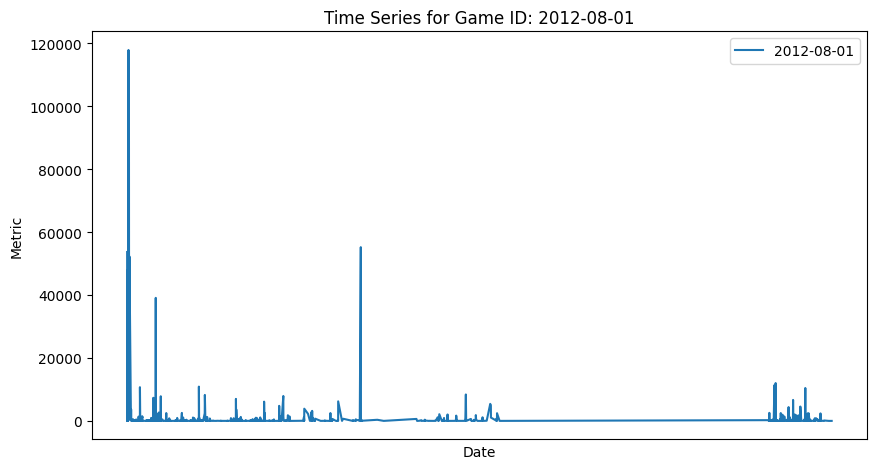

In [31]:
# Assuming the first column in timestamps_df is the game ID
game_id = timestamps_df.columns[1]
game_time_series = timestamps_df[[game_id]].dropna()
game_time_series['Date'] = pd.to_datetime(game_time_series.index)
game_time_series.set_index('Date', inplace=True)

# Plotting the time series
game_time_series.plot(figsize=(10, 6), title=f"Time Series for Game ID: {game_id}")
plt.xlabel('Date')
plt.ylabel('Metric')
plt.show()


2. Merging Data on Game ID

3. Analyzing Game Popularity
Finding the top 5 games by positive reviews:

In [32]:
top_games_by_reviews = details_df.sort_values(by='positive', ascending=False).head(5)
top_games_by_reviews[['name', 'positive']]


,name,positive
730,Counter-Strike: Global Offensive,6818622
570,Dota 2,1746111
271590,Grand Theft Auto V,1450589
578080,PUBG: BATTLEGROUNDS,1303590
105600,Terraria,1192625


4. Price Analysis

Counting how many games belong to each genre:

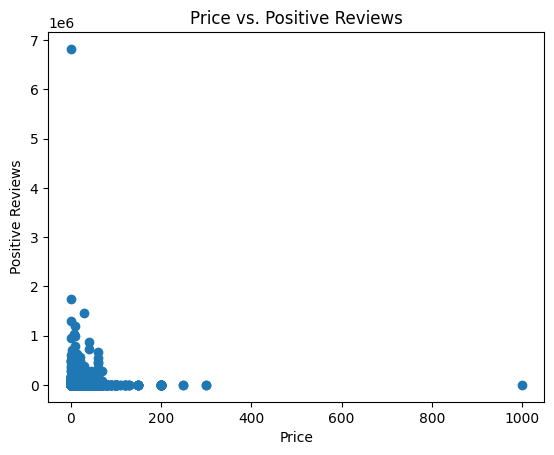

In [33]:
plt.scatter(details_df['price'], details_df['positive'])
plt.title('Price vs. Positive Reviews')
plt.xlabel('Price')
plt.ylabel('Positive Reviews')
plt.show()


In [34]:
#Correlation

correlation_matrix = details_df[['ccu', 'positive', 'negative']].corr()
correlation_matrix


,ccu,positive,negative
ccu,1.000000,0.876220,0.843733
positive,0.876220,1.000000,0.802338
negative,0.843733,0.802338,1.000000


In [35]:
import pandas as pd
import ast

# Load the datasets
timestamps_df = pd.read_csv('timestamps.csv')
details_df = pd.read_csv('details.csv')

# Merging the datasets on their unique IDs
merged_df = pd.merge(details_df, timestamps_df, left_on='Unnamed: 0', right_on='Unnamed: 0')

# Convert the string representation of lists in the 'genre' column to actual lists
merged_df['genre'] = merged_df['genre'].apply(ast.literal_eval)

# Explode the dataframe so that each genre gets its own row
exploded_genres_df = merged_df.explode('genre')

# Group by genre and calculate total positive reviews, total negative reviews, and average player count
genre_analysis = exploded_genres_df.groupby('genre').agg(
    total_positive_reviews=pd.NamedAgg(column='positive', aggfunc='sum'),
    total_negative_reviews=pd.NamedAgg(column='negative', aggfunc='sum'),
    average_player_count=pd.NamedAgg(column='2023-12-01', aggfunc='mean') # using the latest month's data for player count
).reset_index()

# Sort the result by total positive reviews in descending order
genre_analysis_sorted = genre_analysis.sort_values(by='total_positive_reviews', ascending=False)

# Display the top 5 genres based on positive reviews
top_genres_by_positive_reviews = genre_analysis_sorted.head(5)
top_genres_by_positive_reviews


,genre,total_positive_reviews,total_negative_reviews,average_player_count
2,Action,66945396,11914330,251.806299
13,Indie,39963192,5141754,53.903944
3,Adventure,37803671,6932929,152.299501
18,RPG,24971210,4006574,182.415183
10,Free to Play,21114994,5036428,1068.813848


Parsing the Genre Column </br>
This section of the code parses the 'genre' column of the details_df DataFrame. It converts the string representation of genre lists into actual Python lists for further processing.

In [36]:
import ast

# Parsing the 'genre' column: Convert string representations of lists into actual lists
details_df['genre_list'] = details_df['genre'].apply(ast.literal_eval)

Counting and Ranking Genres </br>
Here, the code counts the occurrences of each genre across all games and ranks them based on popularity. This ranking will be used later to calculate a score for each game based on its genre.

In [37]:
# Counting and ranking genres: Count occurrences of each genre and rank them
all_genres = [genre for sublist in details_df['genre_list'] for genre in sublist]
genre_counts = Counter(all_genres)
genre_popularity = {genre: rank for rank, (genre, count) in enumerate(genre_counts.most_common(), 1)}

Calculating 'Genre Score' </br>
This function calculates a score for each game based on the popularity of its genres.</br>Games with more popular genres might have a broader appeal.

In [38]:
from collections import Counter

# Calculating 'genre_score': Score each game based on the popularity of its genres
def calculate_genre_score(genres, genre_popularity):
    if not genres:
        # Default score for games without genres
        return len(genre_popularity) / 2
    return sum([genre_popularity.get(genre, len(genre_popularity) / 2) for genre in genres]) / len(genres)

details_df['genre_score'] = details_df['genre_list'].apply(lambda genres: calculate_genre_score(genres, genre_popularity))


Normalizing Additional Columns</br>
In this section, the 'num_languages' and 'genre_score' columns are normalized to ensure they are on the same scale as other attributes.

In [39]:
from sklearn.preprocessing import MinMaxScaler
import ast

# Assuming details_df is already loaded with the necessary data

# Create 'num_languages' column by counting the number of languages from the 'languages' column
details_df['num_languages'] = details_df['languages'].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) else 0)

# Normalizing additional columns: 'num_languages' and 'genre_score'
scaler = MinMaxScaler()
additional_columns = ['num_languages', 'genre_score']
additional_normalized_data = scaler.fit_transform(details_df[additional_columns])
additional_normalized_df = pd.DataFrame(additional_normalized_data, columns=additional_columns)


Normalizing Original Attributes and Calculating Success Score</br>
This part of the code normalizes the original game attributes (like positive reviews, negative reviews, etc.) and calculates the initial success score.

In [40]:
# Ensure that the original attributes are selected and normalized
original_columns = ['positive', 'negative', 'average_forever', 'ccu', 'price']
original_normalized_data = scaler.fit_transform(details_df[original_columns])
normalized_df = pd.DataFrame(original_normalized_data, columns=original_columns)

# Calculate the original success score
normalized_df['success_score'] = normalized_df.mean(axis=1)


Incorporating Normalized Columns into Success Score Calculation</br>
Here, the normalized 'num_languages' and 'genre_score' are incorporated into the success score calculation, and the revised success score is added to the original DataFrame.

In [41]:
# Incorporate these into the success score calculation
normalized_df['num_languages'] = additional_normalized_df['num_languages']
normalized_df['genre_score'] = additional_normalized_df['genre_score']
normalized_df['revised_success_score'] = normalized_df[['success_score', 'num_languages', 'genre_score']].mean(axis=1)

# Add the revised success score to the original DataFrame
details_df['revised_success_score'] = normalized_df['revised_success_score']


Displaying Updated DataFrame with Revised Success Score</br>
This section displays the updated DataFrame, including the revised success score for the top 100 games.

In [42]:
# Displaying the updated DataFrame with the revised success score for the top 100 games
output_with_attributes = details_df[['name', 'positive', 'negative', 'average_forever', 'ccu', 
                                     'price', 'num_languages', 'genre_score', 'revised_success_score']].head(100)


Creating a Bar Plot for the Top 100 Games
Finally, this code creates a horizontal bar plot for the top 100 games based on their revised success scores.

C:\Users\kasnikov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39740 (\N{CJK UNIFIED IDEOGRAPH-9B3C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kasnikov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35895 (\N{CJK UNIFIED IDEOGRAPH-8C37}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kasnikov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20843 (\N{CJK UNIFIED IDEOGRAPH-516B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kasnikov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Local

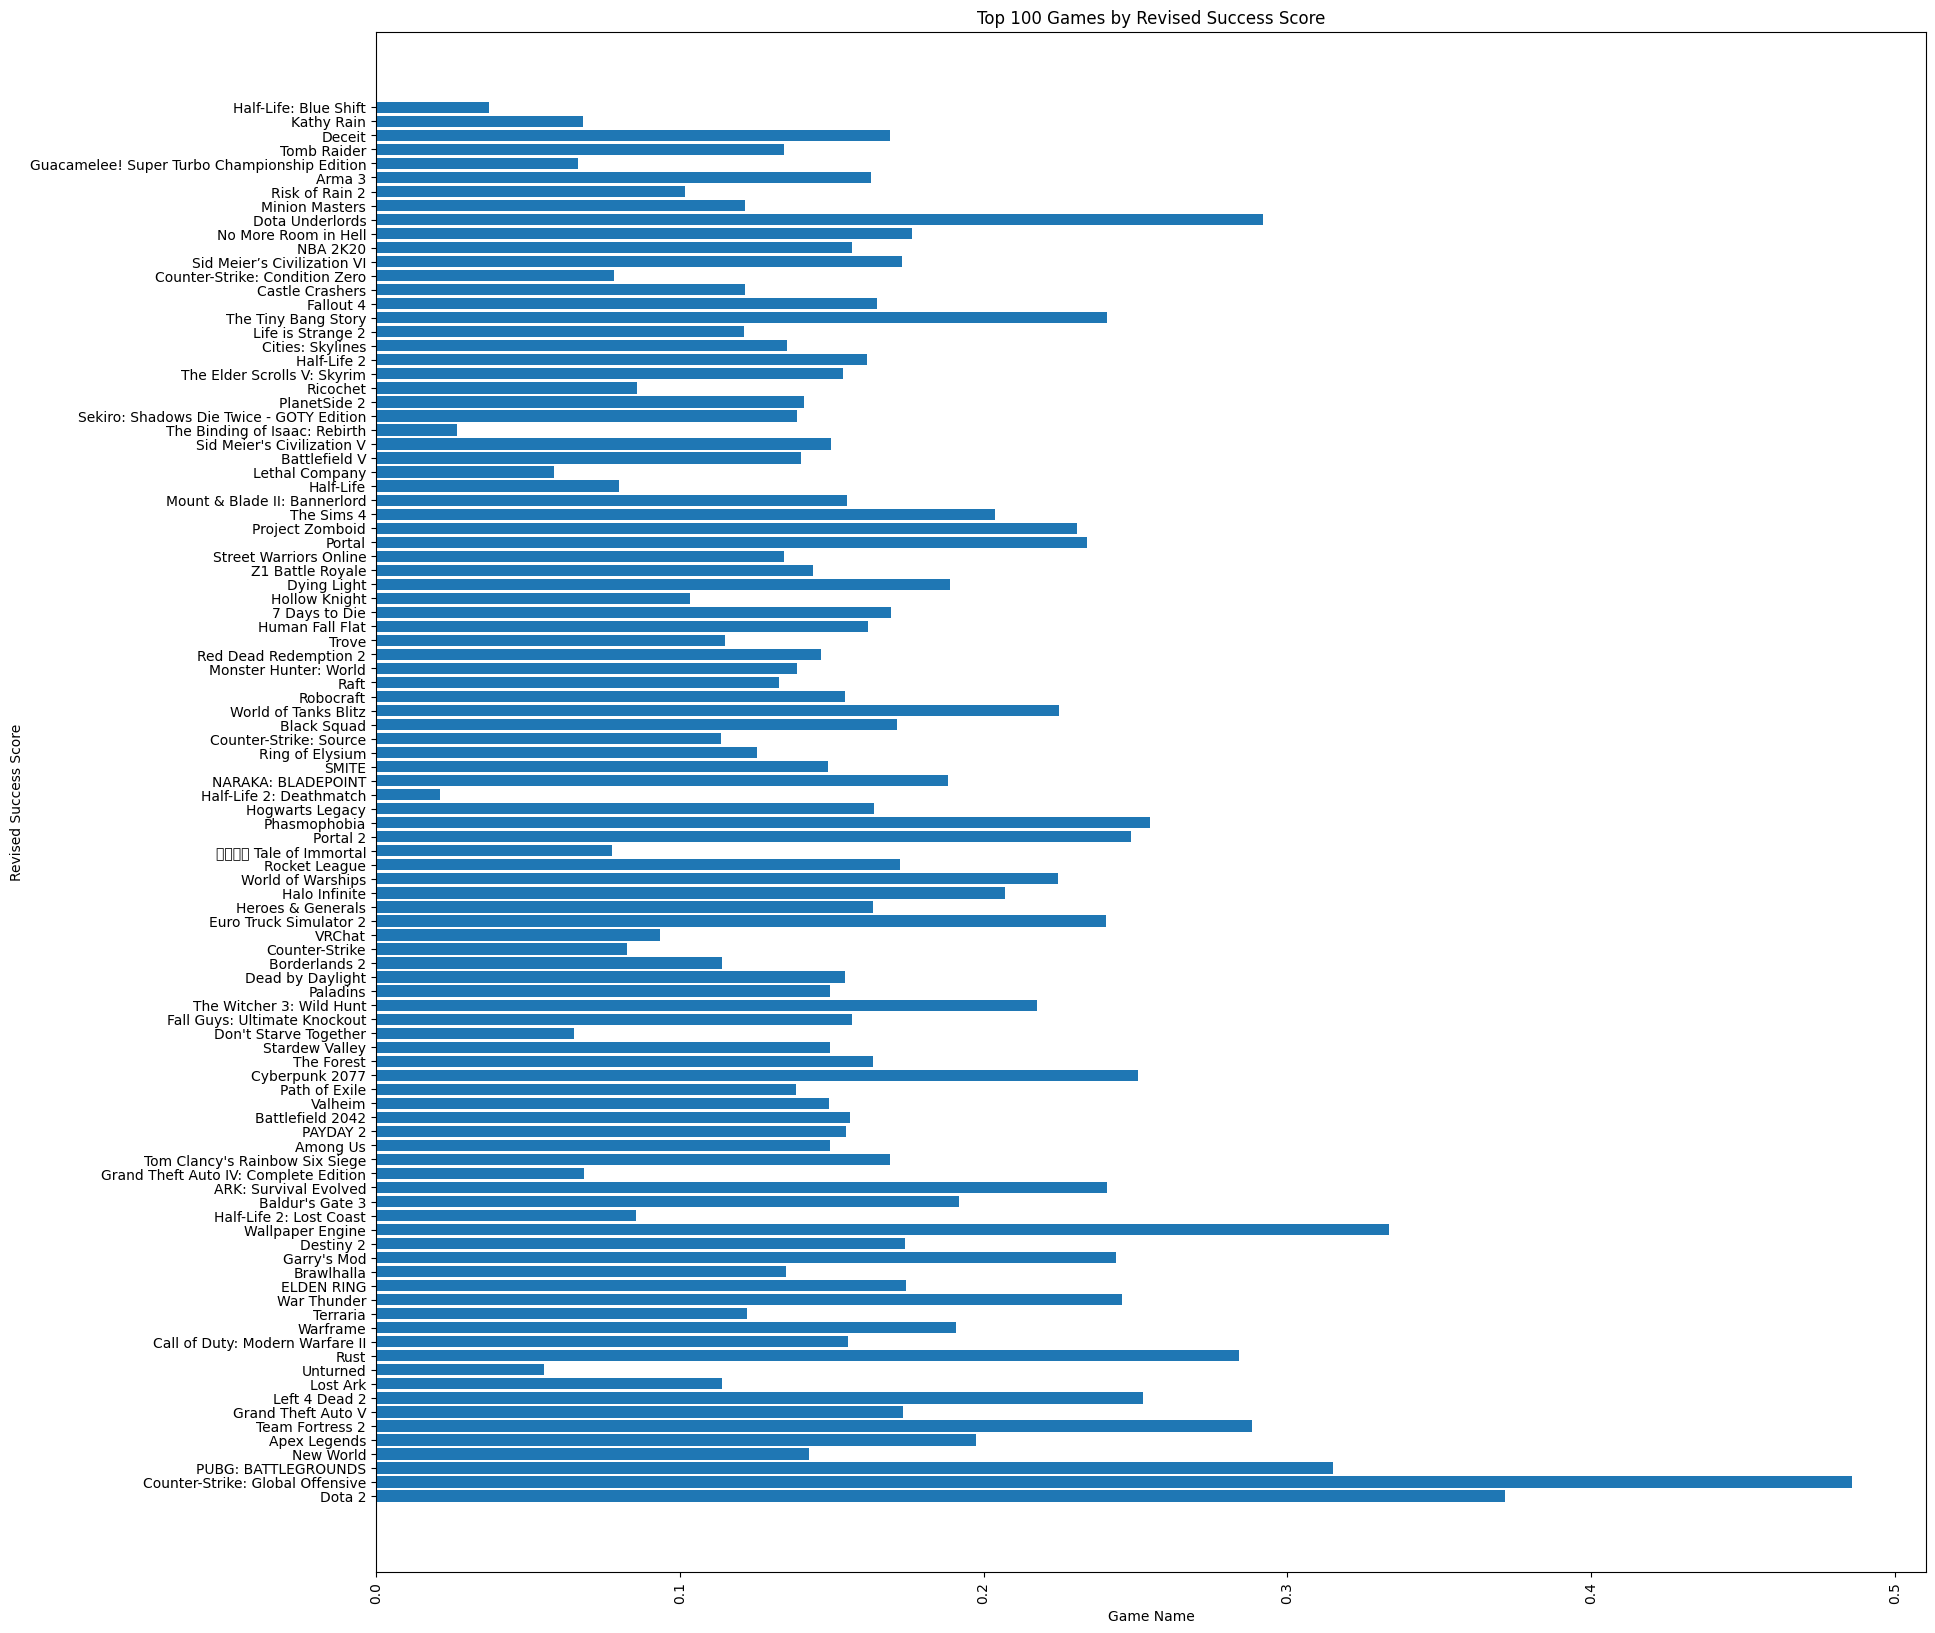

In [43]:
import matplotlib.pyplot as plt

# Creating a bar plot for the top 100 games' revised success scores
plt.figure(figsize=(20, 20))
plt.barh(output_with_attributes['name'], output_with_attributes['revised_success_score'])
plt.xlabel('Game Name')
plt.ylabel('Revised Success Score')
plt.title('Top 100 Games by Revised Success Score')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()
